##path

In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !gdown -O model.zip --id 1E-csmnsn4xfqYG38-JzAZJw2guUYF6yx
!gdown -O model.zip --id 1T8D5SAQagUf1toNumMMAjd4EZRBrhBwm

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1T8D5SAQagUf1toNumMMAjd4EZRBrhBwm
To: /content/model.zip
100% 253M/253M [00:03<00:00, 65.9MB/s]


In [ ]:
!gdown -O question.zip --id 13lgLGcCQXv9bo2z-ZBjSmC_AZoGLh2XX
!gdown -O questionv2.zip --id 1DYOMqWhEP_RV1NymPE3b7dXuneAjC7yp
!gdown -O questionv3.zip --id 1Lg--KBEFK4GBTEg2o-Ql9nDmh8guKBtw

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13lgLGcCQXv9bo2z-ZBjSmC_AZoGLh2XX
To: /content/question.zip
100% 151M/151M [00:01<00:00, 118MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DYOMqWhEP_RV1NymPE3b7dXuneAjC7yp
To: /content/questionv2.zip
100% 8.44M/8.44M [00:00<00:00, 226MB/s]
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id

In [ ]:
!unzip model.zip
!unzip question.zip

Archive:  model.zip
  inflating: weights/args.yaml       
  inflating: weights/best.pt         
  inflating: weights/last.pt         


In [ ]:
!unzip questionv3.zip
!unzip questionv2.zip

Archive:  questionv3.zip
replace content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p0.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p0.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p7.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p4.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p8.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p6.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p5.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p1.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p2.png  
  inflating: content/questdata-v3/images/test/DL_1_Comparison_Model.pdf_p3.png  
  inflating: content/questdata-v3/labels/test/DL_1_Comparison_Model.pdf_p1.txt  
  inflating: content/questdata-v3/labels/test/DL_1

In [ ]:
!cp /content/output/detectQuestionForm/v8m/train2/weights /content/weights -rf

# **ENV**

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.2/530.2 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 23.4 MB/s eta 0:00:00


# **DETECTION**

In [ ]:
category_map = {
    "heading": 0, 
    "question": 1,  
    "subquestion": 2,
    "choice"  : 3,
    "image"   : 4,
    "table"   : 5,
    "blank"   : 6,
    "auxillary_text"   : 7
}
category_weights = {
    "heading": 3, 
    "question": 2,  
    "subquestion": 1,
    "choice"  : 0,
    "image"   : 0,
    "table"   : 0,
    "blank"   : 0,
    "auxillary_text"   : 0
}
reverse_map = {category_map[k]:k for k in category_map}

In [ ]:
from ultralytics import YOLO
model = YOLO('/content/weights/best.pt')  # build from YAML and transfer weights



In [ ]:
# source = "/content/dataset/questiondetection/small"
# source = "/content/dataset/questiondetection/test/P6_Maths_2022_SA2_payalebarmethodist.pdf_25.jpg"
# source = "/content/content/QuestFormCoco/images/val/P6_English_2022_SA2_nanyang.pdf_17.jpg"
source = "/content/content/questdata-v2/images/test/LBS_Topic_-_Living_and_Non-living_Things_-_MCQ.doc.pdf_p0.png"


In [ ]:
detection_results = model.predict(source, save=True, imgsz=(640, 640), conf=0.4, device="cpu")


image 1/1 /content/content/questdata-v2/images/test/LBS_Topic_-_Living_and_Non-living_Things_-_MCQ.doc.pdf_p0.png: 640x512 1 heading, 3 questions, 10 images, 5 blanks, 2 auxillary_texts, 4389.1ms
Speed: 1.1ms preprocess, 4389.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[354.3773, 552.0169, 918.0363, 731.6915,   0.9609,   4.0000]])
cls: tensor([4.])
conf: tensor([0.9609])
data: tensor([[354.3773, 552.0169, 918.0363, 731.6915,   0.9609,   4.0000]])
id: None
is_track: False
orig_shape: tensor([1584, 1224])
shape: torch.Size([1, 6])
xywh: tensor([[636.2068, 641.8542, 563.6589, 179.6746]])
xywhn: tensor([[0.5198, 0.4052, 0.4605, 0.1134]])
xyxy: tensor([[354.3773, 552.0169, 918.0363, 731.6915]])
xyxyn: tensor([[0.2895, 0.3485, 0.7500, 0.4619]])


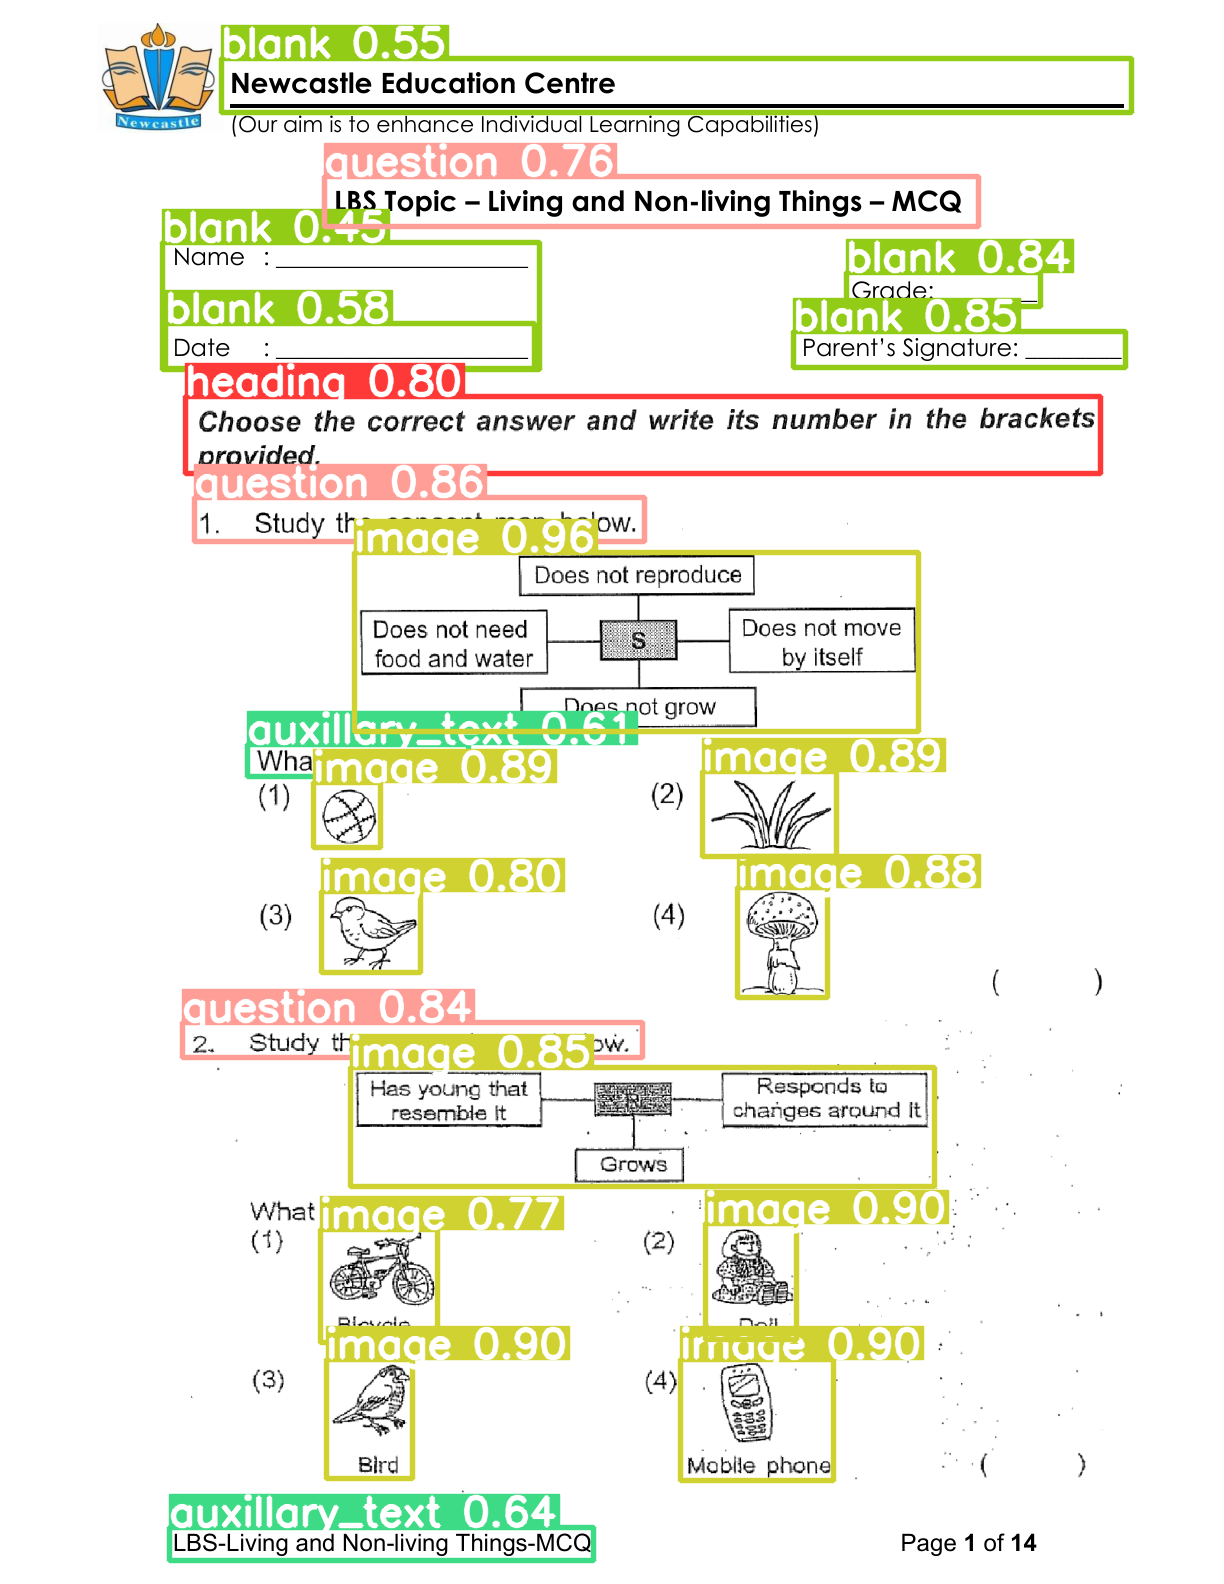

In [ ]:
#@title plot for example
import cv2
from IPython.display import display, Image
for x in detection_results:
    boxes = x.boxes
    masks = x.masks
    probs = x.probs
    print(boxes[0])
    annotated_frame = detection_results[0].plot()

    # Display the annotated frame
    _, encoded_img = cv2.imencode('.png', annotated_frame)
    img_bytes = encoded_img.tobytes()
    display(Image(img_bytes))
    # cv2.imshow("YOLOv8 Inference", annotated_frame)
    break

# **OCR**


### use MathPix ORC

In [ ]:
#!/usr/bin/env python
import requests
import json
import io

In [ ]:
#@title mathpix ocr function
def mathpix_ocrrequest(io_buffer, app_id="", app_key=""):
    try:
        r = requests.post("https://api.mathpix.com/v3/text",
            files={"file": io_buffer},
            data={
            "options_json": json.dumps({
                "math_inline_delimiters": ["$", "$"],
                "rm_spaces": True
            })
            },
            headers={
                "app_id": app_id ,
                "app_key":app_key 
            }
        )
        r = r.json()
        if "text" in r.keys():
            return r['text']
        else :
            return ""
    except Exception as e:
        print("Mathpix_ocr_requestion got error :", e)
        return "???"
# print(json.dumps(r.json(), indent=4, sort_keys=True))

# **Grouping Elements**

In [ ]:
elements = []
orders   = []

def save_image(img):
    name = "xxx.png"
    cv2.imwrite(name, img)
    return name

for i, result in enumerate(detection_results):
    for bidx, box in enumerate(result.boxes):
        cls = reverse_map[int(box.cls)]
        bb = box.xyxy[0].numpy()
        cropped_image = detection_results[i].orig_img[int(bb[1]): int(bb[3]), int(bb[0]): int(bb[2])]
        text = ""
        if cls in ["image", "table"]: #save image/table
            path = save_image(cropped_image)
        else: #OCR on text only: question, subquestion, choice(text), blank, auxillary_text
            _, buffer = cv2.imencode(".png", cropped_image)
            io_buffer = io.BytesIO(buffer)
            # text = mathpix_ocrrequest(io_buffer=io_buffer)

        obj = {"name":cls, 
                "text": text,
               'child':[], 
               "idx": (i, int(box.xyxy[0][1]))} #(page number, y-position)
        elements += [obj]
        
elements = sorted(elements, key=lambda x: x["idx"])
orders = [category_weights[obj['name']] for obj in elements]
if orders[0] < 3:
    orders = [3] + orders
    elements = [{"name":'heading', 
                "text": "Exam Questions",
               'child':[], 
               "idx": (0, 0)}] + elements

In [ ]:
#@title postprocesing
def combine_min_elements(orders, elements):
    arr = orders
    idx_e = [i for i in range(len(elements))]
    order = min(orders)
    
    #Group min elements in orders list : [2 0 0 3 0 1 0 0 1 0 3 2 0 1 0  ] -> [2, [0, 0], 3 [0], 1 [0, 0] 1 [0] 3 2 [0] 1 [0] ]
    tmp = []
    tmp_e = []
    new_arr = []
    new_arr_e =[]
    i = len(arr)-1
    while i >= 0:
        if arr[i] > order:
            new_arr = [arr[i], tmp] + new_arr if len(tmp) > 0 else [arr[i]] + new_arr
            new_arr_e = [idx_e[i], tmp_e[::-1]] + new_arr_e if len(tmp_e) > 0 else [idx_e[i]] + new_arr_e
            tmp = []
            tmp_e = []
        else:
            tmp = [arr[i]]
            tmp_e += [idx_e[i]]
        i -= 1
    #reduce array for [2, [0, 0], 3 [0], 1 [0, 0] 1 [0] 3 2 [0] 1 [0] ] -> [2, 3, 1, 1, 3, 2, 1]
    new_arr_2 = []
    new_arr_2_e = []
    i = 0
    while i < len(new_arr):
        if type(new_arr[i]) == int:
            new_arr_2 += [new_arr[i]]
            new_arr_2_e += [new_arr_e[i]]
        else:
            for j in new_arr_e[i]:
                elements[new_arr_e[i-1]]["child"] += [ elements[j] ] 
        i += 1

    new_arr_2_e = [elements[i] for i in new_arr_2_e]

    return new_arr_2, new_arr_2_e

def group_element(orders, elements):
    """Args:
        - orders : (list[int])   Contain category_weights corresponding elements
        - elements: (list[dict]) Contain all detected element in order from top to bottom of page, from page 0 to page n
        Return: json object like html document object
    """
    o, e = orders, elements
    while len(set(o)) > 1:
        o, e = combine_min_elements(o,e)
    return e
  


In [ ]:
json_obj = group_element(orders, elements)
json_obj

[{'name': 'heading',
  'text': 'Choose the correct answer and write its number in the brackets provided.',
  'child': [{'name': 'question',
    'text': '1. Study the concept map below.',
    'child': [{'name': 'image', 'text': '', 'child': [], 'idx': (0, 552)},
     {'name': 'auxillary_text',
      'text': 'What can $S$ be?',
      'child': [],
      'idx': (0, 744)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 771)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 782)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 887)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 891)}],
    'idx': (0, 497)},
   {'name': 'question',
    'text': '2. Study the concept map below.',
    'child': [{'name': 'image', 'text': '', 'child': [], 'idx': (0, 1067)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 1223)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 1229)},
     {'name': 'image', 'text': '', 'child': [], 'idx': (0, 13

In [ ]:
json_obj[0]['name']

'question'

In [ ]:
json_obj[0]['child'] 

[{'name': 'subquestion',
  'text': "(a) What was the ratio of the number of bows sold to the number of bowls left In Mr Ahmad's shop? Express your answer in its simplest form.",
  'child': [{'name': 'blank',
    'text': 'Ans: $(a)$\n[1]',
    'child': [],
    'idx': (0, 839)}],
  'idx': (0, 448)},
 {'name': 'subquestion',
  'text': '(b) How many plates and bowis did he sell altogether?',
  'child': [{'name': 'blank',
    'text': 'Ans: $(b)$\n[3]',
    'child': [],
    'idx': (0, 1922)}],
  'idx': (0, 965)}]

In [ ]:
json_obj = group_element(orders, elements)
json_obj

[{'name': 'heading',
  'text': 'For each question from 1 to 10 , four options are given. One of them is the correct answer. Make your choice $(1,2,3$ or 4$)$ and shade your answer on the Optical Answer Sheet.\n(10 marks)',
  'child': [{'name': 'question',
    'text': '$1 \\quad$ My teammates and gifted the new student a new soccer ball to commemorate the start of new soccer journey in our school.',
    'child': [{'name': 'choice',
      'text': '(1) I...he',
      'child': [],
      'idx': (0, 425)},
     {'name': 'choice', 'text': '(2) 1...his', 'child': [], 'idx': (0, 470)},
     {'name': 'choice', 'text': '(3) me...he', 'child': [], 'idx': (0, 517)},
     {'name': 'choice', 'text': '(4) me...his', 'child': [], 'idx': (0, 562)}],
    'idx': (0, 292)},
   {'name': 'question',
    'text': '2 The student the teacher spoke about is also an excellent chef.',
    'child': [{'name': 'choice',
      'text': '(1) who',
      'child': [],
      'idx': (0, 774)},
     {'name': 'choice', 'text':